# Financial Derivatives Group Project (100%)

## Team = Europe Group 2

## Part 1: Convergence of Binomial Option Pricing Model (10%)

In this part, you will need the following two functions:
1. Binomial Option Pricing Model for pricing an European call option
2. Black-Scholes-Merton (BSM) Model for an European call option

Next, you have to write a for loop to loop over the number of steps in the binomial tree. 
1. Define two empty lists to store the number of steps and the associated call option price
2. Use the append() function to add these two values in their respective list

Finally, plot **binomical call prices** computed with different numbers of steps (**n in range(1, 201)**) versus the BSM call price. An example output is attached below.


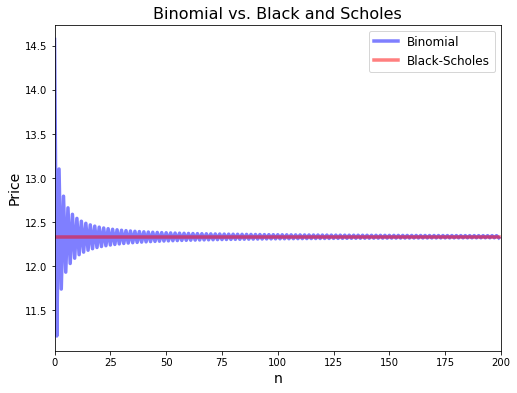

In [1]:
#Import Relevant Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math as m
import pandas as pd

#Define Pricing Functions
#------------------------------------------------------------------------------------------------------------

#function for calculating European Call Price under Black and Scholes
def BSEuroCall(r,T,S,K,v):
    
    d_1 = (m.log(S/K) + (r + 0.5*v**2)*T) / (v * m.sqrt(T))
    d_2 = d_1 - (v * m.sqrt(T))
    Price = S * stats.norm(0,1).cdf(d_1) - K * m.exp(-r*T) * stats.norm(0,1).cdf(d_2)
    
    return(Price)

#function for calculating European Call Price under Binomial Model
def BinoEuroCall(S,K,v,r,n,T):
    
    dt = T/n
    u = m.exp(v*m.sqrt(dt))
    d = 1/u
    q = (m.exp(r*dt)-d)/(u-d)
    Tree = np.zeros((n+1, n+1))
    
    for j in range(n+1):
        for i in range(j+1):
            Tree[i,j] = S * m.pow(d,i) * m.pow(u,j-i)
            Call = np.zeros((n+1, n+1))
            
    for j in range(n+1, 0, -1):
        for i in range(j):
            if (j == n+1):
                Call[i,j-1] = max(Tree[i,j-1]-K, 0)
            else:
                Call[i,j-1] = m.exp(-r*dt) * (q*Call[i,j] + (1-q)*Call[i+1,j])

    return(Call[0,0])

#Run Loops for Prices depending on number of steps
#------------------------------------------------------------------------------------------------------------

#define list where results are stored 
BSCall_list = []
BinoCall_list = []

#Define Input Parameters
S = 100
K = 100
v = 0.25
r = 0.05
T = 1

#run loop 
for n in range(1,201):
    
    BSCall = BSEuroCall(r,T,S,K,v)
    BinoCall = BinoEuroCall(S,K,v,r,n,T)
    BSCall_list.append(BSCall)
    BinoCall_list.append(BinoCall)

#Plot Output
#------------------------------------------------------------------------------------------------------------

#set line colors
colors = ['blue','red']

#define plot and parameters
plt.figure(figsize = (8,6))
plt.gca().set_prop_cycle(color = colors)
plt.plot(BinoCall_list, linewidth = 3.5, alpha = 0.5)
plt.plot(BSCall_list, linewidth = 3.5, alpha = 0.5)
plt.ylabel('Price', size = 14)
plt.xlabel('n', size = 14)
plt.title("Binomial vs. Black and Scholes", size = 16)
plt.legend(labels= ("Binomial", "Black-Scholes"),  prop={'size': 12})
plt.xlim(0,200)
plt.xticks(np.arange(0,225,25))
  
#show plot
plt.show()

Your output should be similar to:

<img src="binomial_convergence.png"  style="width: 500px;"/>

***

## Part 2: Convergence of Monte Carlo Option Pricing Model (10%)

In this part, you will need the following:
1. A procedure of pricing derivatives with Monte Carlo stimulation
2. A function of Black-Scholes-Merton (BSM) Model for an European call option

Next, you have to write a for loop to loop over the number of simulations in the Monte Carlo procedure. 
1. Define two empty lists to store the number of simulations and the associated call option price
2. Use the append() function to add these two values in their respective list

Finally, plot **Monte Carlo call prices** computed with different numbers of steps (**n in range(1, 201, 1)**) versus the BSM call price. An example output is attached below.


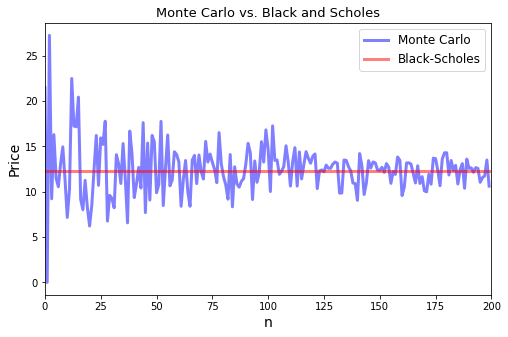

In [2]:
#set random seed
np.random.seed(5)

#Define Pricing Functions (BSEuroCall function already defined in previous code junk)
#------------------------------------------------------------------------------------------------------------
def MCarloCall(nsim, nstep, T, r, v, K, S):
    
    e = np.random.normal(0,1, size=(nsim,nstep))
    drift = (r-0.5*v**2)*(T/nstep)
    shock = v * m.sqrt(T/nstep)*e
    S_t = S*np.exp((drift + shock).cumsum(axis = 1))
    S_T = S_t[:, nstep -1]
    C_T = np.maximum(S_T-K, 0)
    Price = np.exp(-r*T) * np.mean(C_T)
    
    return(Price)

#Run Loops for Prices depending on number of simulations
#------------------------------------------------------------------------------------------------------------

#Define Parameters
S = 100
K = 100
v = 0.25
r = 0.05
T = 1

#define list where results are stored 
BSCall_list = []
MCarloCall_list = []

for n in range(1, 201):
    BSCall_Price = BSEuroCall(r,T,S,K,v)
    MCarloCall_Price = MCarloCall(n,10,T,r,v,K, S)
    BSCall_list.append(BSCall_Price)
    MCarloCall_list.append(MCarloCall_Price)

#Plot Output
#------------------------------------------------------------------------------------------------------------
#set line colors

colors = ['blue','red']

#define plot and parameters
plt.figure(figsize = (8,5))
plt.gca().set_prop_cycle(color = colors)
plt.plot(MCarloCall_list, linewidth = 3, alpha = 0.5)
plt.plot(BSCall_list, linewidth = 3, alpha = 0.5)
plt.ylabel('Price', size = 14)
plt.xlabel('n', size = 14)
plt.title("Monte Carlo vs. Black and Scholes", size = 13)
plt.legend(labels= ("Monte Carlo", "Black-Scholes"),  prop={'size': 12})
plt.xlim(0,200)
plt.xticks(np.arange(0,225,25))

#show plot
plt.show()

### it seems that the output is identical to the sample plot if we use 10 as the number of steps per price path! ###
### therefore, we used 10 as the number of steps and not 1 ###

Your output should be similar to:

<img src="monte_carlo_convergence.png" style="width: 500px;"/>

***

## Part 3: Pricing of an exchange option (20%)

### 3(a) Numerical solution (10%):

The payoff of an exchange option is defined as:

$ V_{\text{exchange},T} =  \max[S_{1,T} - S_{2,T}, 0] $

where $S_{1,T}$ and $S_{2,T}$ are the prices of two underlying assets on the expiration date. In this section, price an exchange option using the Monte Carlo simulation method. You should generate two price processes that are correlated.


In [3]:
np.random.seed(5)

#Define Pricing Functions
#------------------------------------------------------------------------------------------------------------
def MCarloExchange(S1,S2,V1,V2,Rho,r,T,nstep,nsim):
    
    #define two correlated shocks according to
    #https://stats.stackexchange.com/questions/141427/how-does-the-formula-for-generating-correlated-random-variables-work
    x1 = np.random.normal(0,1, size = (nsim,nstep))
    x2 = np.random.normal(0,1, size = (nsim,nstep))

    e_1 = x1
    e_2 = Rho*x1 + np.sqrt(1-Rho**2)* x2
    
    #define drift and shock values for both shocks
    drift_1 = (r-0.5*V1**2)*(T/nstep)
    shock_1 = V1 * np.sqrt(T/nstep) * e_1
    drift_2= (r-0.5*V2**2)*(T/nstep)
    shock_2= V2* np.sqrt(T/nstep) * e_2
    
    #model stock price paths
    S_1  = S1 * np.exp((drift_1 + shock_1).cumsum(axis = 1))
    S_2 = S2 * np.exp((drift_2 + shock_2).cumsum(axis = 1))
    
    #get terminal payoffs 
    S_1_T = S_1[:,nstep-1]
    S_2_T = S_2[:,nstep-1]
    
    #calculate option value
    Payoff = np.maximum(S_1_T-S_2_T,0)
    Price = np.mean(Payoff)*np.exp(-r*T)
    
    return(Price)

#Get Results
#------------------------------------------------------------------------------------------------------------

#Define Parameters
S1 = 50
S2 = 40
V1 = 0.3
V2 = 0.25
Rho = -0.5
r = 0.05
T = 1
nstep = 1
nsim = 1000000

result = round(MCarloExchange(S1,S2,V1,V2,Rho,r,T,nstep,nsim),4)
print("Monte Carlo Exchange Option Price: " + str(result))

Monte Carlo Exchange Option Price: 14.3612


##### Your output should be:

Monte Carlo Exchange option price:
14.3612

***

### 3(b) Analytical solution (10%):

The analytical pricing formula for an exchange option is:

$V_{\text{exchange},t} = S_{1,t}N(\tilde{d}_1) - S_{2,t}N(\tilde{d}_2)$

where:

$ \tilde{d}_1 = \frac{1}{\tilde{\sigma}\sqrt{T-t}}[\ln(\frac{S_{1}}{S_{2}}) + (\frac{\tilde{\sigma}^2}{2})(T-t)] $

$ \tilde{d}_2  = \tilde{d}_1 - \tilde{\sigma}\sqrt{T-t} $

$ \tilde{\sigma}^2 = \sigma_{1}^2 + \sigma_{2}^2 - 2\rho\sigma_{1}\sigma_{2} $

Please define the pricing function of the analytical formula and compare the result with the Monte Carlo simulation.


In [4]:
#Define Pricing Functions
#------------------------------------------------------------------------------------------------------------

def BSExchange(r,V1, V2,T,S1, S2, Rho):
    V = m.sqrt(V1**2 + V2**2 - 2*Rho*V1*V2)
    d1 = 1/(V*m.sqrt(T)) * (m.log(S1/S2) + (V**2/2)*T)
    d2 = d1 - V*m.sqrt(T) 
    Price = S1*stats.norm(0,1).cdf(d1) - S2*stats.norm(0,1).cdf(d2)
    
    return(Price)

#Get Results
#------------------------------------------------------------------------------------------------------------

#Define Parameters
S1 = 50
S2 = 40
V1 = 0.3
V2 = 0.25
Rho = -0.5
r = 0.05
T = 1

result = BSExchange(r,V1, V2,T,S1,S2, Rho)
print("Analytical Exchange Option Price: " + str(round(result, 4)))

Analytical Exchange Option Price: 14.3722


##### Your output should be:

Analytical Exchange option price:
14.3722

***

## Part 4: Stairway bull spread (30%)

<img src="stairway1.png" style="width: 500px;"/>

### 4(a) Replicate the above payoff diagram (10%)

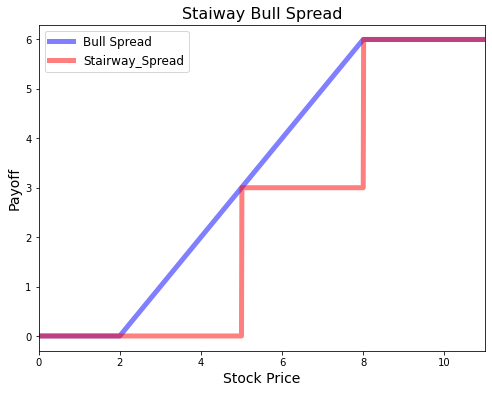

In [5]:
import pandas as pd
import math as m

#Define a Class for Vanilla and Digital Call Options

#Variables: 
#Stock = Range over which the Payoff Function is defined,
#Size = Amount of Contracts for which the Payoff/ Price is determined
#S = Current Stock Price
#r = discount rate
#v = volatility
#T = Time to expiry

#------------------------------------------------------------------------------------------------------------
class C_Option:
    
    def __init__(self, Type, Strike):
        self.Type = Type 
        self.Strike = Strike
    
    def Payoff(self, Stock, Size):
        
        if self.Type == "digital":
            Payoff = np.where(Stock > self.Strike, 1, 0)
        elif self.Type == "vanilla":
            Payoff = np.maximum(Stock - self.Strike,0)
        return(Payoff* Size)

    def Price(self, S,r,v,T, Size):
        
        d_1 = (m.log(S/self.Strike) + (r + 0.5*v**2)*T) / (v * m.sqrt(T))
        d_2 = d_1 - (v * m.sqrt(T))
                    
        if self.Type == "vanilla":
            Price_1 = S * stats.norm(0,1).cdf(d_1) - self.Strike * m.exp(-r*T) * stats.norm(0,1).cdf(d_2)
            Price = Price_1 * Size
            
        if self.Type == "digital":
            Price_1 = stats.norm(0,1).cdf(d_2) * m.exp(-r*T)
            Price = Price_1 * Size
            
        return(Price)

#------------------------------------------------------------------------------------------------------------

Stock_Range = np.arange(0,100,0.01)  

#Initialize Options 
V_Call_2 = C_Option(Type = "vanilla", Strike = 2)
V_Call_8 = C_Option(Type = "vanilla", Strike = 8)
D_Call_5 = C_Option(Type = "digital", Strike = 5)
D_Call_8 = C_Option(Type = "digital", Strike = 8)

#Calculate Strategy Payoffs
Bull_Spread = V_Call_2.Payoff(Stock = Stock_Range, Size = 1) + V_Call_8.Payoff(Stock = Stock_Range, Size = -1)
Stairway_Spread = D_Call_5.Payoff(Stock = Stock_Range, Size = 3) + D_Call_8.Payoff(Stock = Stock_Range, Size = 3)

#Create Data Frame for the Payoffs of both Strategies
Data = pd.DataFrame({"Bull Spread": Bull_Spread, "Stairway_Spread": Stairway_Spread}, index = Stock_Range)

#Plot Output 
#------------------------------------------------------------------------------------------------------------

#set line colors
colors = ['blue','red']

#define plot and parameters
plt.figure(figsize = (8,6))
plt.gca().set_prop_cycle(color = colors)
plt.plot(Data, linewidth = 5, alpha = 0.5)
plt.ylabel('Payoff', size = 14)
plt.xlabel('Stock Price', size = 14)
plt.title("Staiway Bull Spread", size = 16)
plt.legend(labels= Data.columns,  prop={'size': 12})
plt.xlim(0,11)

#show plot
plt.show()

***

### 4(b) Modify your code in part (a) to allow user changing the **number of steps** in the stairway bull spread (10%)


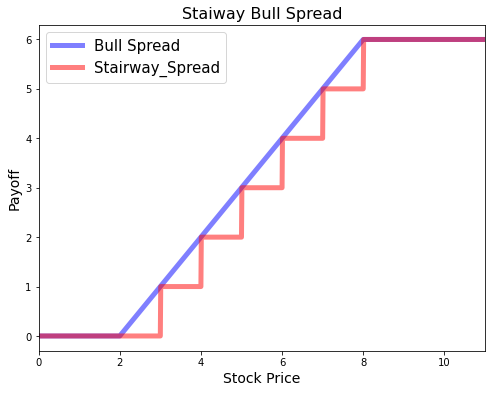

In [7]:
#Define Function which determines the following: 
#- Price & Payoff of a Bullspread
#- Price & Payoff of a Stairway Spread which converges towards the Bull Spread for infinite steps

#Variables
#Start = Strike of the Long Call in the Bullspread 
#End = Strike of the Short Call in the Bullspread 
#N_Steps = Number of steps of the Stairway Spread 

#--------------------------------------------------------------------------------------------------------
def stepper(Start, Stop, N_Steps, Stock, S, r, v, T):
    
    Step_length = (Stop-Start)/N_Steps
    Step_Payoff = (Stop-Start)/N_Steps
    Strikes = np.arange(Start, Stop, Step_length)+Step_length
    
    Payoff_Stairway = 0
    Price_Stairway = 0
    
    #calculate price and payoff for each Option and add up to get strategy price & payoff
    for i in range(len(Strikes)):
        
        Option = C_Option(Type = "digital", Strike = Strikes[i])
        Payoff_Stairway = Payoff_Stairway + Option.Payoff(Size = Step_Payoff, Stock = Stock)
        Price_Stairway = Price_Stairway + Option.Price(S,r,v,T, Size = Step_Payoff)
    
    #Calculate Price and Payoff for the Bull Spread Strategy
    C_Option_Long = C_Option(Type = "vanilla", Strike = Start)
    C_Option_Short = C_Option(Type = "vanilla", Strike = Stop)
    Payoff_Bull = C_Option_Long.Payoff(Stock, 1) + C_Option_Short.Payoff(Stock, -1)
    Price_Bull = C_Option_Long.Price(S,r,v,T, Size = 1) + C_Option_Short.Price(S,r,v,T, Size = -1)
    
    #Combine Payoffs in a Data Frame for easier plotting later on
    Payoffs = pd.DataFrame({"Bull Spread": Payoff_Bull, "Stairway_Spread": Payoff_Stairway}, index = Stock)
    
    Output = {"Payoffs": Payoffs, "Price_Bull": Price_Bull, "Price_Stairway": Price_Stairway}
    
    return(Output)

#---------------------------------------------------------------------------------------------------------
Stock_Range = np.arange(0,15,0.01)  

#Calculate Payoffs, Prices for Bull & Stairway Spread
Data = stepper(Start = 2, Stop = 8, N_Steps = 6, Stock = Stock_Range,
               S = 5, r = 0.05, T = 1, v = 0.25)

#Plot Output 
#---------------------------------------------------------------------------------------------------------

#set line colors
colors = ['blue','red']

#define plot and parameters
plt.figure(figsize = (8,6))
plt.gca().set_prop_cycle(color = colors)
plt.plot(Data["Payoffs"], linewidth = 5, alpha = 0.5)
plt.ylabel('Payoff', size = 14)
plt.xlabel('Stock Price', size = 14)
plt.title("Staiway Bull Spread", size = 16)
plt.legend(labels= Data["Payoffs"].columns,  prop={'size': 15})
plt.xlim(0,11)

#show plot
plt.show()

##### For a step size of 1 (6 steps in total), your output should be similar to:
<img src="stairway2.png" style="width: 500px;"/>

***

### 4(c) After increasing the number of steps in the stairway bull spread to 1,000, compare the **price of the bull spread** and the **price of the stairway bull spread** (10%)


Bull Spread: 3.0681
Stairway Bull Spread: 3.0654


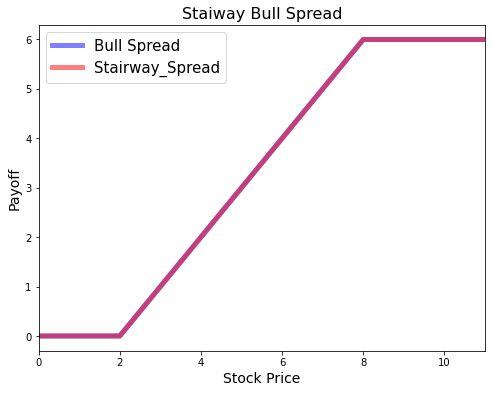

In [9]:
#Calculate Payoff & Price for Bull & Stairway Spread with 1000 Steps
#---------------------------------------------------------------------------------------------------------

Data = stepper(Start = 2, Stop = 8, N_Steps = 1000, Stock = Stock_Range, 
               S = 5, r = 0.05, T = 1, v = 0.25)

#Plot Output 
#---------------------------------------------------------------------------------------------------------

#set line colors
colors = ['blue','red']
#define plot and parameters
plt.figure(figsize = (8,6))
plt.gca().set_prop_cycle(color = colors)
plt.plot(Data["Payoffs"], linewidth = 5, alpha = 0.5)
plt.ylabel('Payoff', size = 14)
plt.xlabel('Stock Price', size = 14)
plt.title("Staiway Bull Spread", size = 16)
plt.legend(labels= Data["Payoffs"].columns,  prop={'size': 15})
plt.xlim(0,11)

#Print Results & Show Plot
#---------------------------------------------------------------------------------------------------------

print("Bull Spread: " + str(round(Data["Price_Bull"], 4)))
print("Stairway Bull Spread: " + str(round(Data["Price_Stairway"], 4)))

#show plot
plt.show()

##### Your output should be:
Bull spread: 3.0681

Stairway bull spread: 3.0654

<img src="stairway3.png" style="width: 500px;"/>

***

## Part 5: Implied volatility (15%)

The sample code below solves:

$ y = x^3 - 2x^2 + 1 $ and $ y = 10 $

by the **method of bisection**

<div class="alert alert-block alert-success">
<b>Example:</b> 
    
    def f(x):
    y = x**3 - 2*x**2 + 1
    return y

    max_iter = 100
    precision = 1.0e-3

    y_actual = 10
    lg = 0
    ug = 5

    for i in range(0, max_iter):

        ylg = f(lg) - y_actual

        mg = (lg + ug)/2
        y = f(mg) - y_actual


        if (ylg * y) < 0:
            ug = mg
        else:
            lg = mg

        print('*** This is loop #'+str(i)+' ***')
        print('The guess for x is ' + str(round(mg,3)) + ' and the y value is ' + str(round(y,3)))

        if (abs(y) < precision):
            break # end the loop
</div>

**Modify** the above code to find the implied volatility of an European call option with the **Black-Scholes-Merton** call price of **\$3.743**.

The model parameters are as follows:
- S = 13
- K = 10
- r = 0.05
- T = 1

In [10]:
#Speficy Parameters
#---------------------------------------------------------------------------------------------------------

max_iter = 100
precision = 1.0e-3

#Actual Options Price
BSEuroCall_actual = 3.743

#low_guess = volatility value for which BsEuroCall() < 3.743 resp. BSEuroCall(low_guess)- BSEuroCall_Actual < 0
#high_guess = volatility value for which BsEuroCall() > 3.743 resp. BSEuroCall(low_guess)- BSEuroCall_Actual > 0

low_guess = 0.01
high_guess = 10

#Set up Loop to find implied_vol by bisection
#---------------------------------------------------------------------------------------------------------

for i in range(0, max_iter):
    
    #y = difference between guessed value and actual value
    y_low_guess = BSEuroCall(S = 13, K = 10, r = 0.05, T = 1, v = low_guess) - BSEuroCall_actual
    
    #Calculate value at Midpoint between low and high guess
    middle_guess = (low_guess + high_guess)/2
    y_middle_guess = BSEuroCall(S = 13, K = 10, r = 0.05, T = 1, v = middle_guess) - BSEuroCall_actual
    
    #if middle guess - BSEuroActual < 0 -> Middle Guess becomes new low guess 
    #if middle guess - BSEuroActual > 0 -> Middle Guess becomes new high guess
    
    if (y_low_guess * y_middle_guess) < 0:
        high_guess = middle_guess
    else:
        low_guess = middle_guess
    
    #Print guesses
    print('*** This is loop #'+str(i)+' ***')
    print('The guess for Implied_Volatlity is ' + str(round(middle_guess,3)) + ' and the y value is ' + str(round(y_middle_guess,3)))

    if (abs(y_middle_guess) < precision):
        break # end the loop if guess is precise enough

#As we can see, the implied volatility that corresponds to the Option Price of 3.743 and the specified parameters
#S, K, r, T is 30% (or 0.3)

*** This is loop #0 ***
The guess for Implied_Volatlity is 5.005 and the y value is 9.12
*** This is loop #1 ***
The guess for Implied_Volatlity is 2.507 and the y value is 6.933
*** This is loop #2 ***
The guess for Implied_Volatlity is 1.259 and the y value is 3.442
*** This is loop #3 ***
The guess for Implied_Volatlity is 0.634 and the y value is 1.121
*** This is loop #4 ***
The guess for Implied_Volatlity is 0.322 and the y value is 0.058
*** This is loop #5 ***
The guess for Implied_Volatlity is 0.166 and the y value is -0.234
*** This is loop #6 ***
The guess for Implied_Volatlity is 0.244 and the y value is -0.127
*** This is loop #7 ***
The guess for Implied_Volatlity is 0.283 and the y value is -0.042
*** This is loop #8 ***
The guess for Implied_Volatlity is 0.303 and the y value is 0.007
*** This is loop #9 ***
The guess for Implied_Volatlity is 0.293 and the y value is -0.018
*** This is loop #10 ***
The guess for Implied_Volatlity is 0.298 and the y value is -0.006
*** T

***

## Part 6: Volatility surface (15%)

1. **Download** the **option data** of a stock that you like from **Yahoo! Finance**.
2. Plot the **volatility surface** (x: strike, y: maturity, z: implied volatility) of options issued on the stock.

An example of volatility surface of S&P 500 Mini SPX Options Index is given by:

<img src="xsp_vs.png" style="width: 500px;"/>

### This is a snapshot of the below code output that was taken when US Markets were open and nicely shows the Volatility Smile of AAPL Options

<img src="AAPL_Volatility_Smile.png" style ="width: 700px;"/>

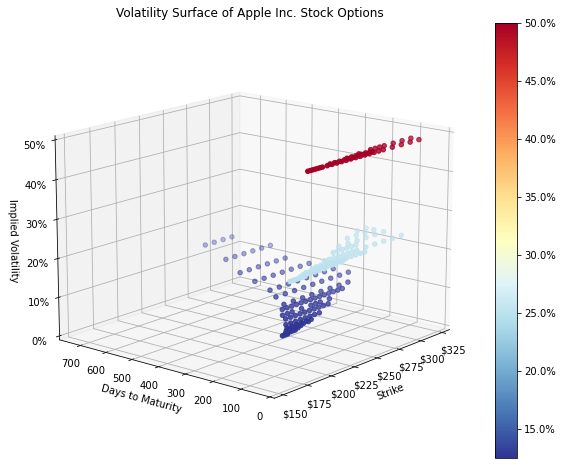

In [11]:
#import needed libraries
import yfinance as yf
from datetime import date 
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as mtick

#Select Stock
#---------------------------------------------------------------------------------------------------------
Ticker = "AAPL"
Stock = yf.Ticker(Ticker)

#Create Strike/Implied_Vol/ TTM DataFrame 
#loop through all Option Series Dates, extract strike and implied vola, claculate TTM as difference 
#between today and expiry and paste all data frames together

#clean Data and remove all volatilities above 100% as these values are relatively rare or due to very low trading volumes
#or stale prices for large cap stocks and would distort the graph (for high vol stocks, the boundary may have to be
#adjusted upwards)
#Lower than 10% is removed since some points have a volatility of 0 or unrealistically low if no data exists for some strikes
#---------------------------------------------------------------------------------------------------------
df = pd.DataFrame()

today = date.today()
for i in Stock.options:
    tmp = Stock.option_chain(i).calls
    tmp = tmp[["strike", "impliedVolatility"]]
    tmp["maturity"] = pd.to_datetime(i, format = "%Y-%m-%d", errors = "ignore") - pd.to_datetime(date.today())
    
    try:
        df = pd.concat([df, tmp])
    except: 
        df = tmp
        
#Clean Results
#Depending on the maximum plausible implied vol of a stock, upper boundary may have to be adjsuted!!!
df = df[df["impliedVolatility"] <= 1]
df = df[df["impliedVolatility"] >= 0.1]


#Plot Results
#!RESULTS ARE ONLY REPRESENTATIVE DURING US TRADING HOURS!
#---------------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x = df.strike
y = df.maturity.dt.days
z = df.impliedVolatility

#set axis limits dynamically based on imputs
ax.set_zlim(0, max(df.impliedVolatility))
ax.set_xlim(max(df.strike)+10, min(df.strike) -10 )
ax.set_ylim((max(df.maturity)).days,0)

#set angle of 3d plot
ax.view_init(15, 40)

#plot observations and select color map
sc = ax.scatter(x, y, z, c=z,cmap= "RdYlBu_r")
cb = plt.colorbar(sc, format = mtick.PercentFormatter(1.0))

#set dynamic title based on input and axis titles
plt.title("Volatility Surface of " + Stock.info["shortName"] +" Stock Options")
ax.set_xlabel("Strike")
ax.set_ylabel("Days to Maturity")
ax.set_zlabel("Implied Volatility")

#format axis ticks
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('$%d'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.gca().zaxis.set_major_formatter(mtick.PercentFormatter(1.0))

#plt.savefig("AAPL_Volatility_Smile.png")
plt.show()

***